Running Tutorial Using Collab:

In [1]:
pip install glhmm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from glhmm import glhmm, preproc, utils, graphics

In [29]:
import os
from google.colab import files
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

import sys
sys.path.append('/content/gdrive/My Drive/CNS-Tutorial-2024/')
!cp '/content/gdrive/My Drive/CNS-Tutorial-2024/example_data/data.csv' .
!cp '/content/gdrive/My Drive/CNS-Tutorial-2024/example_data/dataX.csv' .
!cp '/content/gdrive/My Drive/CNS-Tutorial-2024/example_data/T.csv' .

Mounted at /content/gdrive


In [30]:
brain_data = pd.read_csv('/content/gdrive/My Drive/CNS-Tutorial-2024/example_data/data.csv', header=None).to_numpy()
phys_data = pd.read_csv('/content/gdrive/My Drive/CNS-Tutorial-2024/example_data/dataX.csv', header=None).to_numpy()
T_t = pd.read_csv('/content/gdrive/My Drive/CNS-Tutorial-2024/example_data/T.csv', header=None).to_numpy()


In [33]:
brain_data,_ = preproc.preprocess_data(brain_data, T_t)
phys_data,_ = preproc.preprocess_data(phys_data, T_t)

In [34]:
brainphys_glhmm = glhmm.glhmm(model_beta='state', K=4, covtype='full')

In [35]:
print(brainphys_glhmm.hyperparameters)

{'K': 4, 'covtype': 'full', 'model_mean': 'state', 'model_beta': 'state', 'dirichlet_diag': 10, 'connectivity': None, 'Pstructure': array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]]), 'Pistructure': array([ True,  True,  True,  True])}


In [36]:
brainphys_glhmm.train(X=phys_data, Y=brain_data, indices=T_t)

Init repetition 1 free energy = 1379984.0820874455
Init repetition 2 free energy = 1381929.4357592552
Init repetition 3 free energy = 1381726.8028484131
Init repetition 4 free energy = 1381529.5635497118
Init repetition 5 free energy = 1381756.03689688
Best repetition: 1
Cycle 1 free energy = 1380002.0258502774
Cycle 2 free energy = 1379420.8289335947
Cycle 3, free energy = 1379190.8986732664, relative change = 0.2834700486496313
Cycle 4, free energy = 1379007.429451835, relative change = 0.18446600220817383
Cycle 5, free energy = 1378851.2277494872, relative change = 0.1357333682082847
Cycle 6, free energy = 1378711.9969376898, relative change = 0.10792844287345797
Cycle 7, free energy = 1378606.2568445571, relative change = 0.07575758789553277
Cycle 8, free energy = 1378516.5369073253, relative change = 0.06039757997360515
Cycle 9, free energy = 1378438.1020496709, relative change = 0.05015260821784734
Cycle 10, free energy = 1378356.4851795232, relative change = 0.04959881672826509


(array([[3.64115758e-05, 2.16512391e-04, 9.99644545e-01, 1.02531258e-04],
        [3.29044434e-05, 1.21224532e-03, 9.98440183e-01, 3.14667114e-04],
        [3.10177262e-07, 6.98096815e-05, 9.99888561e-01, 4.13187175e-05],
        ...,
        [1.06934139e-10, 3.23821438e-06, 9.99614360e-01, 3.82401410e-04],
        [1.74766689e-08, 1.68587838e-04, 9.99215136e-01, 6.16258618e-04],
        [2.22601470e-06, 4.51348262e-04, 9.99482827e-01, 6.35983247e-05]]),
 array([[[1.06897736e-05, 3.41200434e-06, 2.15653724e-05, 7.44425363e-07],
         [6.44161006e-07, 8.90193488e-05, 1.25238818e-04, 1.61006235e-06],
         [2.15200950e-05, 1.11862312e-03, 9.98210859e-01, 2.93542073e-04],
         [5.04137771e-08, 1.19084484e-06, 8.25194469e-05, 1.87705526e-05]],
 
        [[1.13810161e-07, 1.82355154e-07, 3.24862479e-05, 1.22030169e-07],
         [4.29231998e-08, 2.97767989e-05, 1.18077373e-03, 1.65186244e-06],
         [1.52118717e-07, 3.96933905e-05, 9.98368390e-01, 3.19479024e-05],
         [1.3

Model inspection

In [37]:
K = brainphys_glhmm.hyperparameters["K"] # the number of states
q = brain_data.shape[1] # the number of parcels/channels
state_betas = np.zeros(shape=(2,q,K))
state_betas = brainphys_glhmm.get_betas()

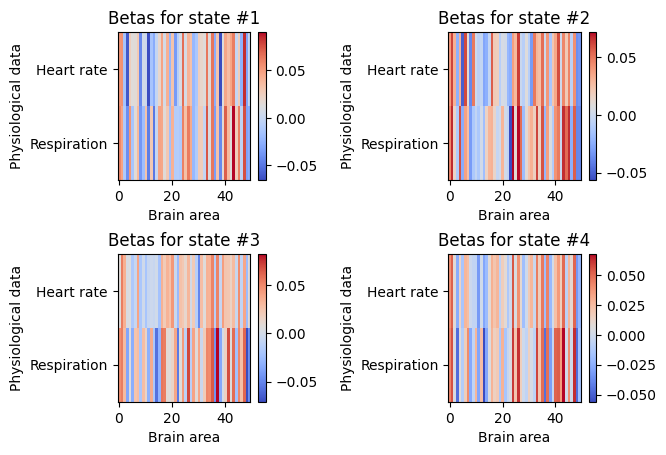

In [38]:
cmap = "coolwarm"
ytick =["Heart rate", "Respiration"]
for k in range(K):
    plt.subplot(2,2,k+1)
    plt.imshow(state_betas[:,:,k], cmap=cmap,aspect='auto', interpolation='none')
    plt.colorbar()
    plt.ylabel('Physiological data')
    plt.yticks(np.arange(2), ytick)
    plt.xlabel('Brain area')
    plt.title(f"Betas for state #{k+1}")
plt.subplots_adjust(hspace=0.5, wspace=1)
plt.show()

In [39]:
state_means = np.zeros(shape=(q, K))
for k in range(K):
    state_means[:,k] = brainphys_glhmm.get_mean(k) # the state means in the shape (no. features, no. states)
state_FC = np.zeros(shape=(q, q, K))
for k in range(K):
    state_FC[:,:,k] = brainphys_glhmm.get_covariance_matrix(k=k) # the state covariance matrices in the shape (no. features, no. features, no. states)

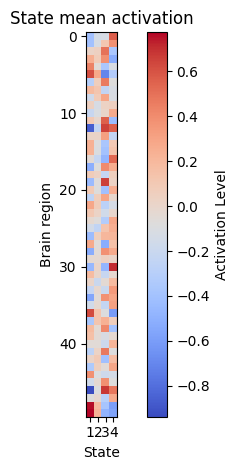

In [40]:
plt.imshow(state_means,cmap=cmap, interpolation="none")
plt.colorbar(label='Activation Level') # Label for color bar
plt.title("State mean activation")
plt.xticks(np.arange(K), np.arange(1,K+1))
plt.gca().set_xlabel('State')
plt.gca().set_ylabel('Brain region')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

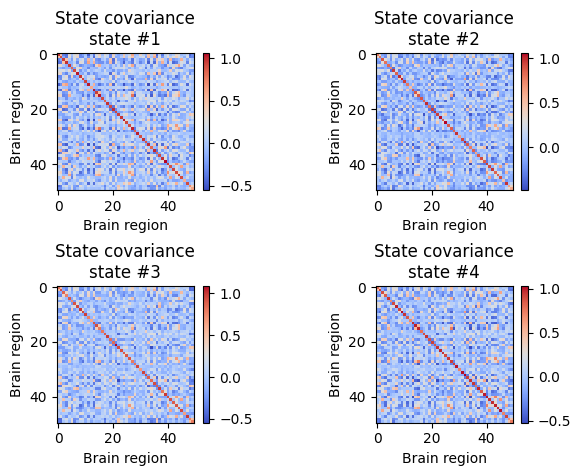

In [41]:
for k in range(K):
    plt.subplot(2,2,k+1)
    plt.imshow(state_FC[:,:,k], cmap=cmap, interpolation="none")
    plt.xlabel('Brain region')
    plt.ylabel('Brain region')
    plt.colorbar()
    plt.title("State covariance\nstate #%s" % (k+1))
plt.subplots_adjust(hspace=0.7, wspace=0.8)
plt.show()

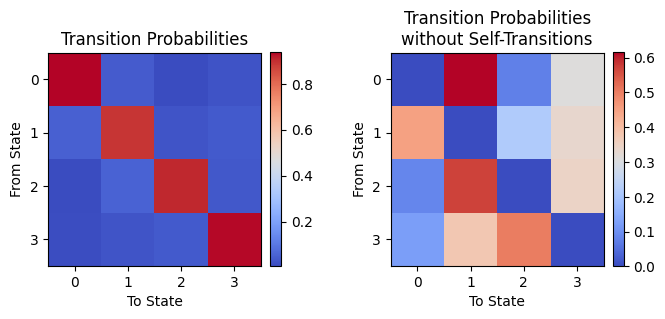

In [42]:
TP = brainphys_glhmm.P.copy() # the transition probability matrix

# Plot Transition Probabilities
plt.figure(figsize=(7, 4))

# Plot 1: Original Transition Probabilities
plt.subplot(1, 2, 1)
plt.imshow(TP, cmap=cmap, interpolation='nearest')  # Improved color mapping
plt.title('Transition Probabilities')
plt.xlabel('To State')
plt.ylabel('From State')
plt.colorbar(fraction=0.046, pad=0.04)

# Plot 2: Transition Probabilities without Self-Transitions
TP_noself = TP - np.diag(np.diag(TP))  # Remove self-transitions
TP_noself2 = TP_noself / TP_noself.sum(axis=1, keepdims=True)  # Normalize probabilities
plt.subplot(1, 2, 2)
plt.imshow(TP_noself2, cmap=cmap, interpolation='nearest')  # Improved color mapping
plt.title('Transition Probabilities\nwithout Self-Transitions')
plt.xlabel('To State')
plt.ylabel('From State')
plt.colorbar(fraction=0.046, pad=0.04)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [43]:
vpath = brainphys_glhmm.decode(X=phys_data, Y=brain_data, indices=T_t, viterbi=True)

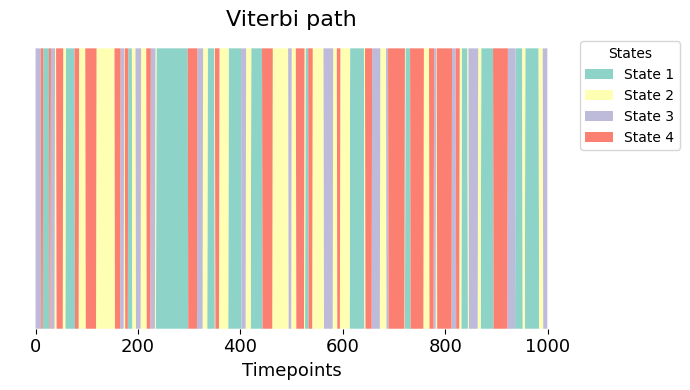

In [44]:
num_subject = 0
graphics.plot_vpath(vpath[T_t[num_subject,0]:T_t[num_subject,1],:], title="Viterbi path")

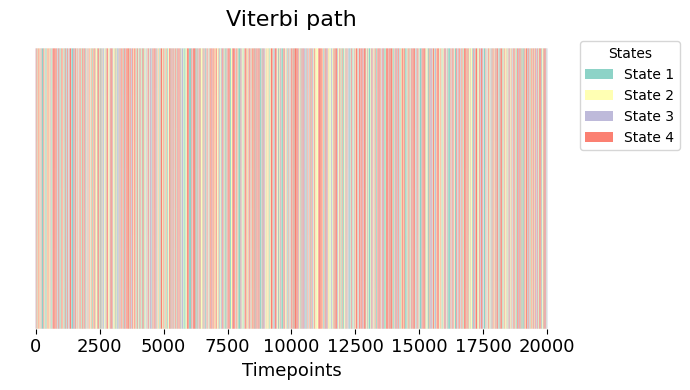

In [45]:
graphics.plot_vpath(vpath, title="Viterbi path")